In [209]:
import pandas as pd


In [210]:
arquivo_train = pd.read_csv('train_loan_prediction.csv')
arquivo_test = pd.read_csv('test_loan_prediction.csv')

In [211]:
arquivo_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [212]:
arquivo_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [213]:
arquivo_train.shape

(614, 13)

In [214]:
arquivo_test.shape

(367, 12)

In [215]:
arquivo_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [216]:
arquivo_drop = arquivo_train.drop(['Loan_ID'], axis = 1)

In [217]:
arquivo_drop.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [218]:
faltantes = arquivo_drop.isnull

In [219]:
# Transformando dados categóricos em numéricos:
arquivo_numerico =  {'Male': 1, 'Female': 2,'Yes': 1, 'No': 2, 'Graduate': 1, 'Not Graduate': 2,'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0, '3+': 3}

In [220]:
arquivo_drop = arquivo_drop.applymap(lambda s: arquivo_numerico.get(s) if s in arquivo_numerico else s)

In [221]:
arquivo_drop.dtypes

Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [222]:
concatenado.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
3                    0
0                    0
1                    0
2                    0
dtype: int64

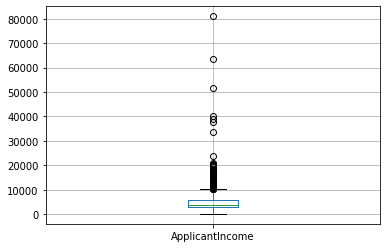

In [148]:
import matplotlib.pyplot as plt 
arquivo_train.boxplot(column = 'ApplicantIncome')
plt.show()

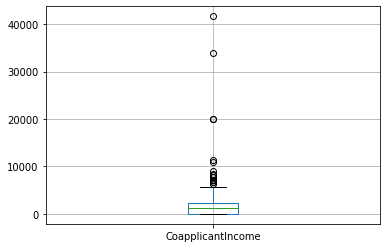

In [149]:
import matplotlib.pyplot as plt 
arquivo_train.boxplot(column = 'CoapplicantIncome')
plt.show()

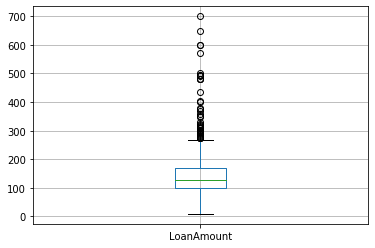

In [150]:
import matplotlib.pyplot as plt 
arquivo_train.boxplot(column = 'LoanAmount')
plt.show()

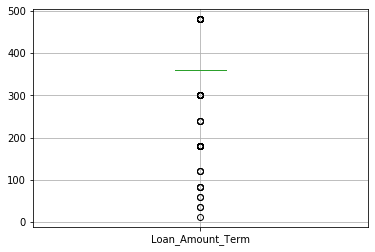

In [28]:
import matplotlib.pyplot as plt 
arquivo_train.boxplot(column = 'Loan_Amount_Term')
plt.show()

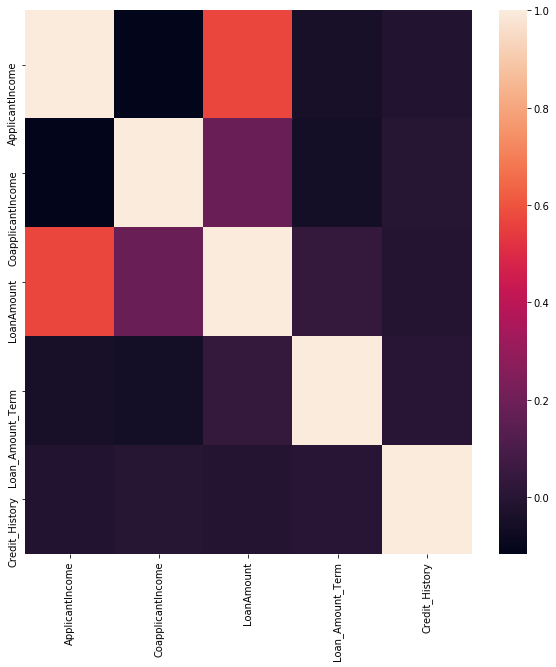

In [151]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure (figsize = (10,10))
sns.heatmap (arquivo_train.corr())
plt.show()

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [234]:
y = concatenado['Loan_Status']
x = concatenado.drop('Loan_Status', axis = 1)

In [235]:
x_treino, y_treino, x_teste, y_teste = train_test_split (x, y, test_size = 0.30)

In [236]:
modelo = LogisticRegression()

In [237]:
# Confusion Matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separando os dados entre treino e teste:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x,y, test_size = 0.3, random_state = 9)

# Criando o modelo:
modelo = LogisticRegression(C = 0.01, penalty = 'l2')
modelo.fit(X_treino, Y_treino)

# Score
resultado = modelo.score(X_teste, Y_teste)

# Imprimindo a melhor acurácia 
print ('Melhor acurácia:', resultado)

Melhor acurácia: 0.7142857142857143


In [238]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalizando as variáveis preditoras:
normalizador = MinMaxScaler(feature_range = (0,1))
X_norm = normalizador.fit_transform(x)

# Separando os dados entre treino e teste:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_norm, y, test_size = 0.3, random_state = 16)

# Criação do modelo
modelo = KNeighborsClassifier(n_neighbors = 5)
modelo.fit(X_treino, Y_treino)

# Score:
resultado = modelo.score(X_teste, Y_teste)
print('Acurácia:', resultado)

Acurácia: 0.7687074829931972


In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Separando os dados em folds
skfold = StratifiedKFold(n_splits = 5, random_state = 8)

# Criação do modelo
modelo = DecisionTreeClassifier()
resultado = cross_val_score(modelo,x,y,cv=skfold)

# Imprimindo a acurácia
print (resultado.mean())

0.7081632653061225


C:\Users\prisc\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
